In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Helper functions

In [5]:
def load(csv):
    df = pd.read_csv(csv)
    df.index = pd.to_datetime(df.index)
    df['Lights Power'] = tot_lights(df)
    return df
    
def tot_lights(df):
     return df['Lights Zone 1'] + df['Lights Zone 2'] +  df['Lights Zone 3'] +  df['Lights Zone 4'] +  df['Lights Zone 5']

# Compare Baselines

This notebook compares the baseline performance energy performance of buildings with and without daylighting from different seasons.

## January

In January, only the heating system is turned on.

In [6]:
heat = load('../baselines/heating_blindsFalse.csv')
# heat = heat[:'1991-02-01 23:45:00']
# heat_blinds = load('../baselines/heating_blindsTrue.csv')
# heat_blinds = heat_blinds[:'1991-02-01 23:45:00']

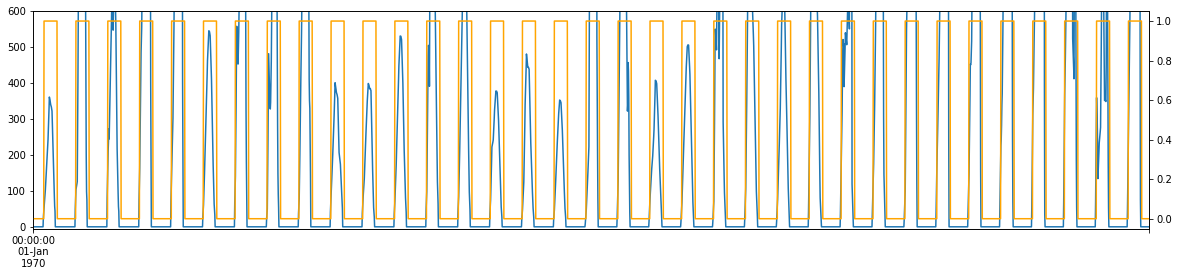

In [31]:
ill = (heat['Illuminance 1'] + heat['Illuminance 2']) / 2
ax = heat['Illuminance 1'].plot(figsize=(20,4))
ax.set_ylim(-5, 600)
ax1 = ax.twinx()
heat['Occupancy Flag'].plot(ax=ax1, c='orange')

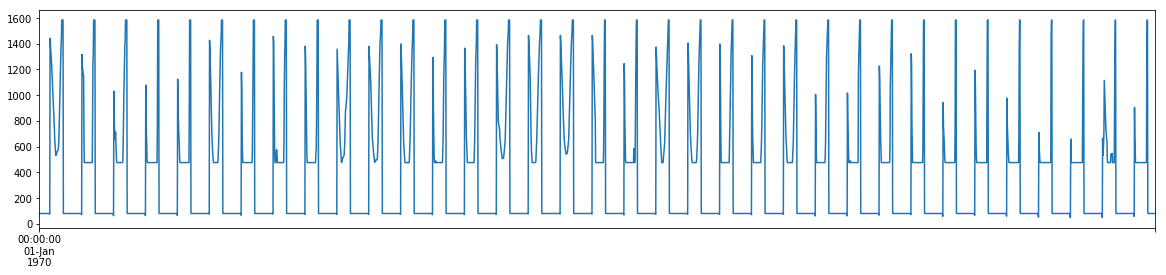

In [30]:
heat['Lights Zone 1'].plot(figsize=(20,4))

In [52]:
heat_blinds['Illuminance 1'].sum(), heat['Illuminance 1'].sum()

(1617647.0428930752, 1617647.0428930752)

In [53]:
heat_blinds['Heat Coil Power'].sum(), heat['Heat Coil Power'].sum()

(8257990.7442585025, 8238850.296666534)

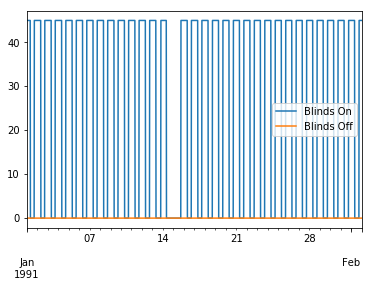

In [43]:
heat_blinds['Blind Angle Zone 1'].plot(label='Blinds On')
heat['Blind Angle Zone 1'].plot(label='Blinds Off')
plt.legend()

In [45]:
heat_blinds['Lights Power'].sum(), heat['Lights Power'].sum()

(9215514.863236813, 9215514.863236813)

# July

In July, only the cooling system is turned on.

In [46]:
cool = load('../baselines/cooling_blindsFalse.csv')
cool = cool['1991-07-01':'1991-07-31 23:45:000']
cool_blinds = load('../baselines/cooling_blindsTrue.csv')
cool_blinds = cool_blinds['1991-07-01':'1991-07-31 23:45:000']

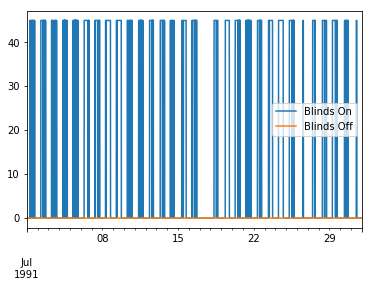

In [47]:
cool_blinds['Blind Angle Zone 1'].plot(label='Blinds On')
cool['Blind Angle Zone 1'].plot(label='Blinds Off')
plt.legend()

In [48]:
cool_blinds['Cool Coil Power'].sum(), cool['Cool Coil Power'].sum()

(7495839.813553976, 7551543.487929856)

In [49]:
cool_blinds['Illuminance Exceeded 1'].sum(), cool['Illuminance Exceeded 1'].sum()

(249.75, 264.25)

In [50]:
cool_blinds['Lights Power'].sum(), cool['Lights Power'].sum()

(8769104.145532064, 8574513.130917514)